<font color='red' size='+4'><b>Exploratory Data Analysis</b></font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from collections import Counter
import textwrap
import re


import warnings
warnings.filterwarnings('ignore')

<font color='magenta' size='+3'><b>Dataset</b></font>

In [2]:
movie_reviews = pd.read_csv('/content/drive/MyDrive/Devoir2/train.csv', sep = 'delimiter', names = ['text'], skiprows=1)

# Separating IDs and labels from reviews
movie_reviews[['id', 'label', 'review']] = movie_reviews.text.str.split(",", n=2, expand = True)


# Drop unnecessary columns
movie_reviews = movie_reviews [['label', 'review']]
movie_reviews.head()

,label,review
0,1,Wizards of the Lost Kingdom is a movie about a...
1,1,Brilliant adaptation of the largely interior m...
2,1,Typical De Palma movie made with lot's of styl...
3,1,This is a fantastic series first and foremost....
4,1,My only minor quibble with the film I grew up ...


In [3]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   25000 non-null  object
 1   review  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [4]:
movie_reviews['label'] = movie_reviews['label'].astype(int)

<font color='magenta' size='+3'><b>Reviews</b></font>

In [5]:
wrapper = textwrap.TextWrapper(width=80)

# Code for underlining
underline_start = '\033[4m'
underline_end = '\033[0m'


# Print the first n reviews
n = 10
for i, review in enumerate(movie_reviews['review'].head(n)):
    header = f"Review {i+1}:"
    wrapped_review = wrapper.fill(review)
    print(f"{underline_start}{header}{underline_end}\n{wrapped_review}\n")

Review 1:
Wizards of the Lost Kingdom is a movie about a young prince (Simon) who is
banished from his kingdom due to his father (the king) being killed by the
cliche "evil adviser". This movie's about Simon's adventures. The special
effects, plot, acting, and generally everything about this movie is BAD.
However, it's so bad that it's funny. You will keep watching this movie simply
because it's so bad it's funny, and, like the other reviewer of the movie said,
it's so bad it's good.

Review 2:
Brilliant adaptation of the largely interior monologues of Leopold Bloom,
Stephen Dedalus, and Molly Bloom by Joseph Strick in recreating the endearing
portrait of Dublin on June 16, 1904 - Bloomsday - a day to be celebrated -
double entendre intended! Bravo director Strick, screenwriter Haines, as well as
casting director and cinematographer in creating this masterpiece. Gunter Grass'
novel, The Tin Drum filmed by Volker Schlöndorff (1979)is another fine film
adaptation of interior monologue wh

In [6]:
def clean_review(review):
    # Remove HTML tags
    cleanr = re.compile('<.*?>')
    review = re.sub(cleanr, '', review)

    # Remove signatures (e.g., "Name email date")
    review = re.sub(r'\b\w+@\w+\.\w+\b', '', review)  # Remove email addresses
    review = re.sub(r'\b\d{1,2} (?:January|February|March|April|May|June|July|August|September|October|November|December) \d{4}\b', '', review)  # Remove dates (e.g., "15 June 2008")

    return review.strip()


movie_reviews['review'] = movie_reviews['review'].apply(clean_review)


wrapper = textwrap.TextWrapper(width=80)

# Code for underlining
underline_start = '\033[4m'
underline_end = '\033[0m'


# Print the first n reviews
n = 10
for i, review in enumerate(movie_reviews['review'].head(n)):
    header = f"Review {i+1}:"
    wrapped_review = wrapper.fill(review)
    print(f"{underline_start}{header}{underline_end}\n{wrapped_review}\n")

Review 1:
Wizards of the Lost Kingdom is a movie about a young prince (Simon) who is
banished from his kingdom due to his father (the king) being killed by the
cliche "evil adviser". This movie's about Simon's adventures. The special
effects, plot, acting, and generally everything about this movie is BAD.
However, it's so bad that it's funny. You will keep watching this movie simply
because it's so bad it's funny, and, like the other reviewer of the movie said,
it's so bad it's good.

Review 2:
Brilliant adaptation of the largely interior monologues of Leopold Bloom,
Stephen Dedalus, and Molly Bloom by Joseph Strick in recreating the endearing
portrait of Dublin on June 16, 1904 - Bloomsday - a day to be celebrated -
double entendre intended! Bravo director Strick, screenwriter Haines, as well as
casting director and cinematographer in creating this masterpiece. Gunter Grass'
novel, The Tin Drum filmed by Volker Schlöndorff (1979)is another fine film
adaptation of interior monologue wh

<font color='magenta' size='+2'><b>Reviews length</b></font>

In [7]:
# blankspace as separator
review_lengths = movie_reviews['review'].apply(lambda x: len(x.split()))

print("Review Lengths:")
print(review_lengths)

Review Lengths:
0         84
1        140
2        215
3        212
4        230
        ... 
24995    151
24996    114
24997    155
24998     83
24999    253
Name: review, Length: 25000, dtype: int64


In [8]:
print("\nSummary Statistics:")
print(review_lengths.describe(percentiles=[0.1, 0.25, 0.5, 0.60, 0.75, 0.80, 0.90, 0.95, 0.99]))


Summary Statistics:
count    25000.000000
mean       229.702920
std        170.654827
min         10.000000
10%         89.000000
25%        125.000000
50%        172.000000
60%        202.000000
75%        279.000000
80%        319.000000
90%        450.000000
95%        588.000000
99%        900.010000
max       2450.000000
Name: review, dtype: float64


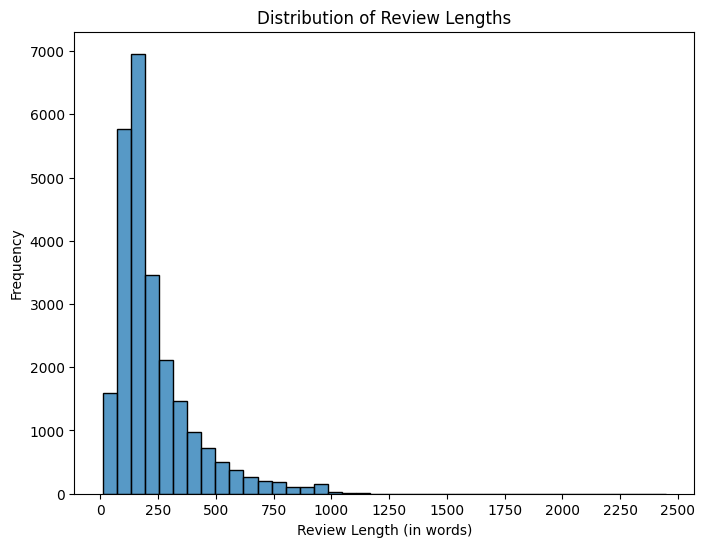

In [9]:
palette = 'cool'

plt.figure(figsize=(8, 6))
sns.histplot(review_lengths, bins = 40, kde = False, palette = palette, edgecolor='black')
plt.xlabel('Review Length (in words)')
plt.ylabel('Frequency')
plt.title('Distribution of Review Lengths')
max_length = review_lengths.max()
bin_edges = np.arange(0, max_length + 250, 250)
plt.xticks(bin_edges)

plt.show()

<font color='magenta' size='+3'><b>Labels</b></font>

Text(0, 0.5, 'Frequency')

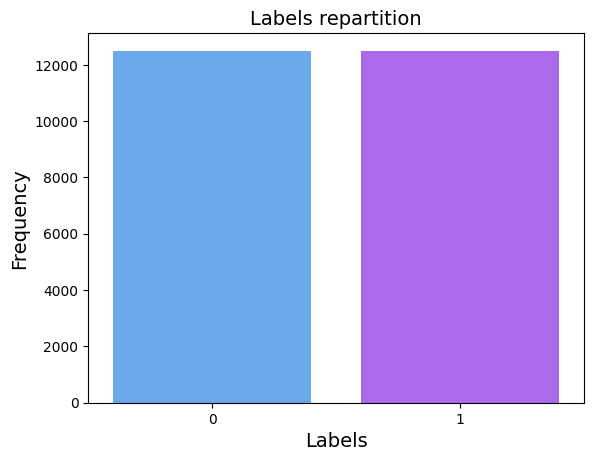

In [10]:
sns.set_palette(palette)
sns.countplot(data = movie_reviews, x = 'label', palette = palette)
plt.title("Labels repartition", fontsize = 14)
plt.xlabel('Labels', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)